K-nearest Neighbours Classification

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# y is the target species from 0, 1 or 2
y = iris['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[ 0.25435516, -0.02893008],
       [ 0.49953791, -0.14022187],
       [ 0.53635187,  0.06871783],
       [-0.60650252,  0.1420104 ],
       [ 0.26606906, -0.31639692]])

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
y_predict = knn_model.predict(X_test)
y_predict


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

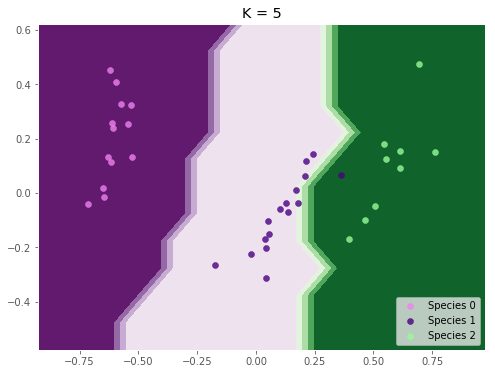

In [7]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()